# Brazillian No Show Appointments Analysis

## Introduction

A patient and a doctor book an appointment. The patient receives all instructions. In the end, the patient doesn't show. What happened? Can anything in their personal background explain why they showed or didn't show up for their appointment?

This dataset focuses on whether or not patients show up for their medical appointments in Brazil, as well as the factors that could affect their decision-making process.

Over the course of this report, I will attempt to answer the following questions:

* Does the day when patients set up their appointments affect whether they show up or not?

* Does a patient's day of appointment affect whether they show up or not?

* How does SMS received affect whether patients show up or not?

* Does enrollment into the Bolsa Familia welfare program determine whether or not a patient shows up for their medical appointment?

* Does a patient's condition (hipertension, diabetes, handicap, alcololism) affect whether they show up for their appointment or not?

In [1]:
# Importing all relevant packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Dataset Overview

The dataset contains 110,527 entries with 14 columns. The most important column is the `No-show` column, which indicates whether a patient showed up for their appointment or not. The other columns include:

+ PatientId - Identification of a patient
+ AppointmentID - Identification of each appointment
+ Gender - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
+ DataMarcacaoConsulta - The day of the actuall appointment, when they have to visit the doctor.
+ DataAgendamento - The day someone called or registered the appointment, this is before appointment of course.
+ Age - How old is the patient.
+ Neighbourhood - Where the appointment takes place.
+ Scholarship - True of False. Whether a patient is a part of the [Brazilian social welfare program](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) or not.
+ Hipertension - True or False
+ Diabetes - True or False
+ Alcoholism - True or False
+ Handcap - True or False
+ SMS_received - Number of messages sent to the patient.
+ No-show - True or False.

In [2]:
# Load the data and print out a few lines

no_show_df = pd.read_csv('no_show_appointments.csv')
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
no_show_df.shape

(110527, 14)

In [4]:
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Preliminary investigation of the dataset reveals that there are 110,527 entries and 14 columns. There are no missing values in any of the columns.

Columns include:

* PatientId - This is a patient's unique hospital number
* AppointmentID - This is a patient's appointment identification number
* Gender - This refers to a patient's gender (M- Male, F- Female)
* ScheduledDay - This tells us on what day the patient set up their appointment
* AppointmentDay - This tells the date when a patient is assigned to see a doctor
* Age - This refers to the patient's age
* Neighbourhood - Tells us where the patient lives
* Scholarship - Indicates whether or not the patient is enrolled in the Brazilian welfare program Bolsa Familia
* Hipertension - Indicates the type of illness the patient suffers
* Diabetes - Indicates the type of illness the patient suffers
* Alcoholism - Tells us how excessively a patient consumes/has consumed alcoholic beverages
* Handicap - Tells us about a patient's incapacity
* SMS_received - SMS received from the hospital
* No-show - Tells us whether a patient showed up or not for their medical appointment



In [5]:
no_show_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# Replacing negative values with positive in the Age column
no_show_df['Age'] = abs(no_show_df['Age'])

In [7]:
no_show_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088892,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110176,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
no_show_df.isnull()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110523,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110524,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110525,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Text(0, 0.5, 'Patients')

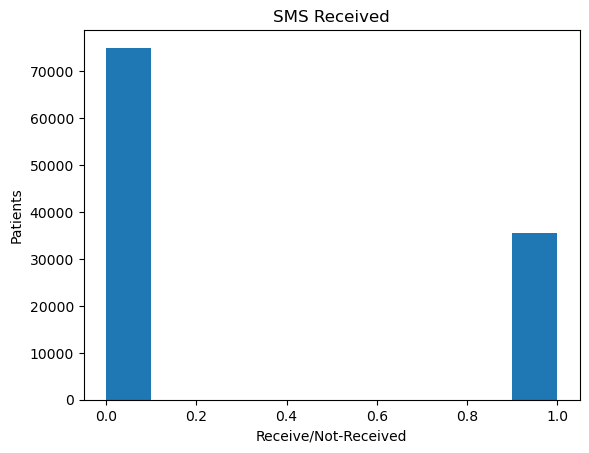

In [9]:
no_show_df['SMS_received'].plot(kind= 'hist')
plt.title('SMS Received')
plt.xlabel('Receive/Not-Received')
plt.ylabel('Patients')

**The above chart shows over 70,000 patients did not receive SMS. There are just about 30,000 patients who received SMS.**

Text(0.5, 1.0, 'Age')

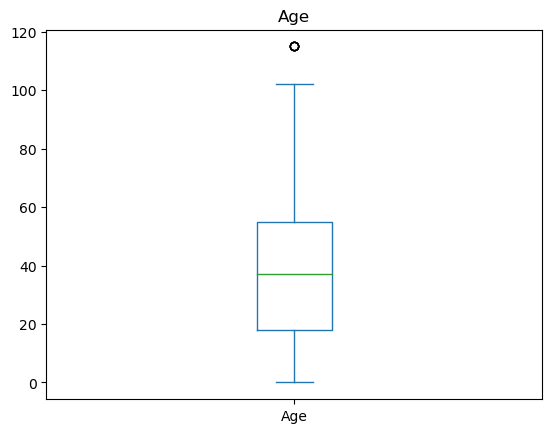

In [10]:
no_show_df['Age'].plot(kind= 'box')
plt.title('Age')

**The above chart shows most patients were aged under 60, and the median Age is just under 40.**

Text(0, 0.5, 'Patients')

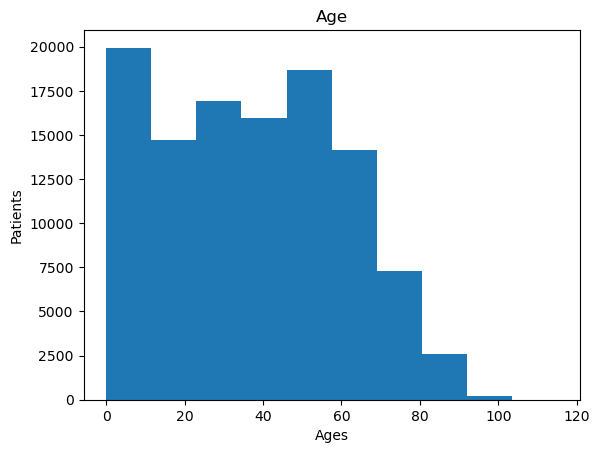

In [11]:
no_show_df['Age'].plot(kind= 'hist')

plt.title('Age')
plt.xlabel('Ages')
plt.ylabel('Patients')

**The histogram chart above provides a clearer perspective shows on the age of patients; there are just over 17,500 patients between the ages of 0 to 10. There is a very small number of patients aged between 80 and 100.**

**In order to find the relationship between the available factors (e.g. Diabetes, Appointment Day, Alcoholism etc) and patients' show or no-show, I will plot a few graphs below, as this will answer the questions posed at the outset**

**I will also assign a function to avoid repetitive code and make this analysis easy on the eye**

**But first, let us find out whether the day of the week when a patient set up their appointment can affect whether they show up or not. To achieve this, I will convert ScheduleDay to a datetime object and create a new column called schedule_day showing the days of the week when different patients set up their medical appointments.**

In [12]:
# Confirm the data type for the ScheduleDay column

type(no_show_df['ScheduledDay'][0])

str

In [13]:
# Convert ScheduledDay to a datetime object

no_show_df['schedule_day'] = pd.to_datetime(no_show_df['ScheduledDay']).dt.day_name()

In [14]:
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,schedule_day
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [15]:
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
 14  schedule_day    110527 non-null  object 
dtypes: float64(1), int64(8), object(6)
memory usage: 12.6+ MB


**Now let us assign a function:**

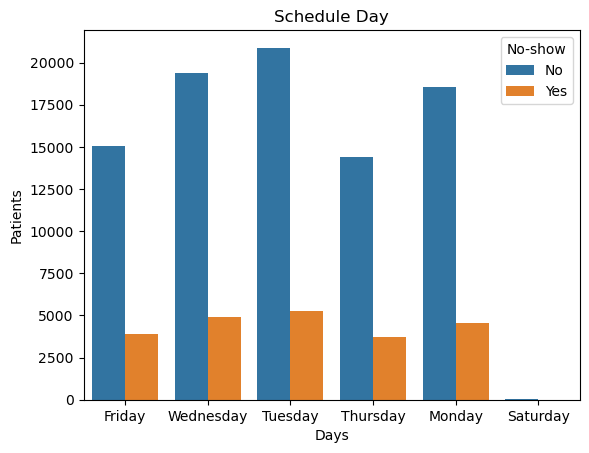

In [16]:
def plot(no_show_df, x, y, title= 'a', xlabel= 'x', ylabel='y'):
    #This is my logic
    sns.countplot(data=no_show_df, x=x, hue=y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

plot(no_show_df, 'schedule_day', 'No-show', title= 'Schedule Day', xlabel= 'Days', ylabel= 'Patients')

**This chart answers the question: "Does the day when patients set up their appointments affect whether they show up or not?"**

**Here we can see that while Tuesday and Wednesday are the days when patients scheduled appointments the most, it did not affect whether they showed up or not.**

**Let us also convert AppointmentDay to a datetime object and create a column called day_of_appointment showing the days of the week when patients had their medical appointments:**

In [17]:
# Convert AppointmentDay to a datetime object

no_show_df['day_of_appointment'] = pd.to_datetime(no_show_df['AppointmentDay']).dt.day_name()

In [18]:
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,schedule_day,day_of_appointment
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


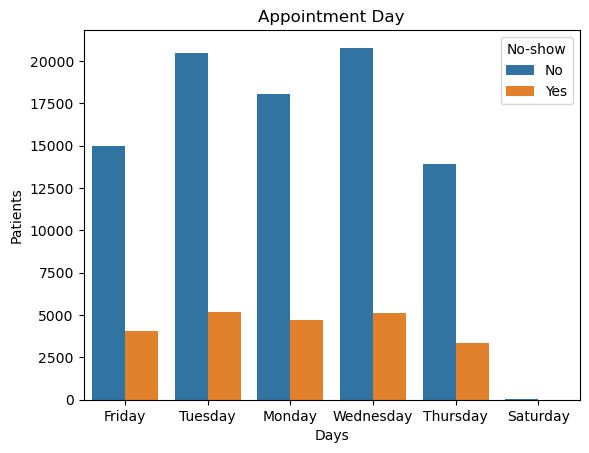

In [20]:
plot(no_show_df, 'day_of_appointment', 'No-show', title= 'Appointment Day', xlabel= 'Days', ylabel= 'Patients')

**The above chart answers the question: "Does a patient's day of appointment affect whether they show up or not?" The chart shows that those who had their Appointment Day on Tuesday and Wednesday showed up those most.**

**Checking for missing values:**

In [21]:
no_show_df.isnull()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,schedule_day,day_of_appointment
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110523,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110524,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110525,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
no_show_df.isnull().sum()

PatientId             0
AppointmentID         0
Gender                0
ScheduledDay          0
AppointmentDay        0
Age                   0
Neighbourhood         0
Scholarship           0
Hipertension          0
Diabetes              0
Alcoholism            0
Handcap               0
SMS_received          0
No-show               0
schedule_day          0
day_of_appointment    0
dtype: int64

**There are no missing values.**

**Checking if SMS received affected show/no-show:**

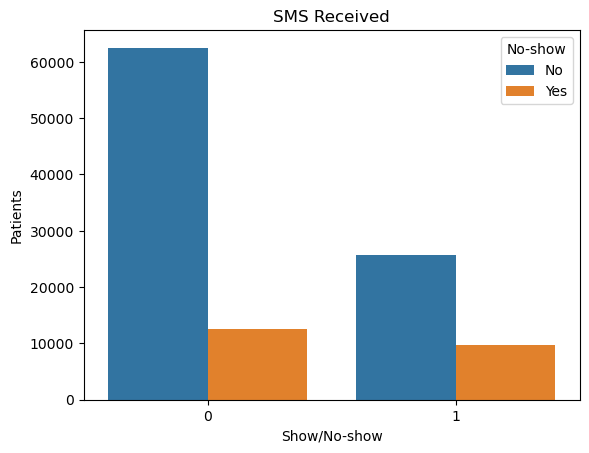

In [23]:
plot(no_show_df, 'SMS_received', 'No-show', title= 'SMS Received', xlabel= 'Show/No-show', ylabel= 'Patients')

In [24]:
#Creating No_show as a new column

no_show_df['No_show'] = no_show_df.loc[:, 'No-show'].apply(lambda x : 0 if x == "No" else 1)

In [25]:
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,schedule_day,day_of_appointment,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0


In [26]:
no_show_df.groupby('SMS_received').mean()['No_show']

SMS_received
0    0.167033
1    0.275745
Name: No_show, dtype: float64

**The above chart indicates that most people who did not receive SMS showed up for their medical appointment; most of those who received SMS did not show up for their appointment**

**As a result, we can conclude that SMS received did not increase the possibility of patients showing up**

**Now let us find out whether enrollment into the Bolsa Familia welfare program affects whether patients show up for their appointment or not with the next chart:**

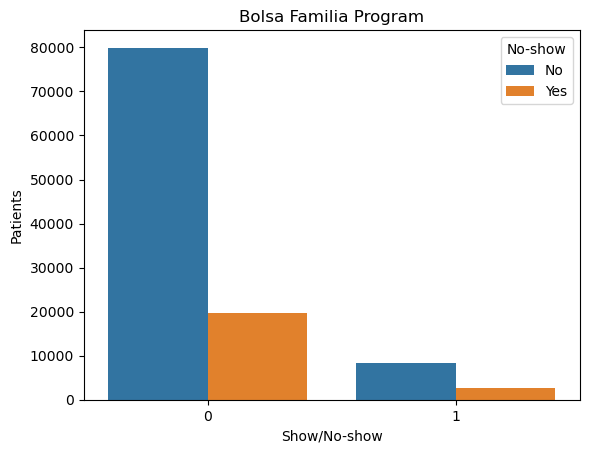

In [28]:
plot(no_show_df, 'Scholarship', 'No-show', title='Bolsa Familia Program', xlabel= 'Show/No-show', ylabel= 'Patients')

In [27]:
no_show_df.groupby('Scholarship').mean()['No_show']

Scholarship
0    0.198072
1    0.237363
Name: No_show, dtype: float64

**The chart and table above answers the question: "Does enrollment into the Bolsa Familia welfare program determine whether or not a patient shows up for their medical appointment?" Here we can see that most people who were enrolled in the Bolsa Familia welfare program did not book medical appointments.**

**Specifically, 23% of patients enrolled in the welfare program did not show up for their appointment, while 19% of those who were not enrolled did show up.**

**In the following four charts, we want to answer the question: "Does a patient's condition (hipertension, diabetes, handicap, alcololism) affect whether they show up for their appointment or not?"**

**I will check each condition on an individual basis for clarity:**

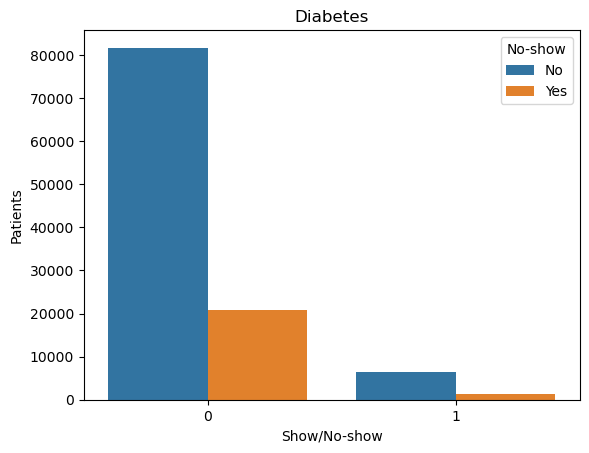

In [29]:
plot(no_show_df, 'Diabetes', 'No-show', title= 'Diabetes', xlabel= 'Show/No-show', ylabel= 'Patients')

In [29]:
no_show_df.groupby('Diabetes').mean()['No_show']

Diabetes
0    0.203628
1    0.180033
Name: No_show, dtype: float64

**The above chart shows that most diabetes patients showed up for their medical appointment.** **The table shows that 20% of those with diabetes showed up for their appointment, while 18% without diabetes did not show up.**

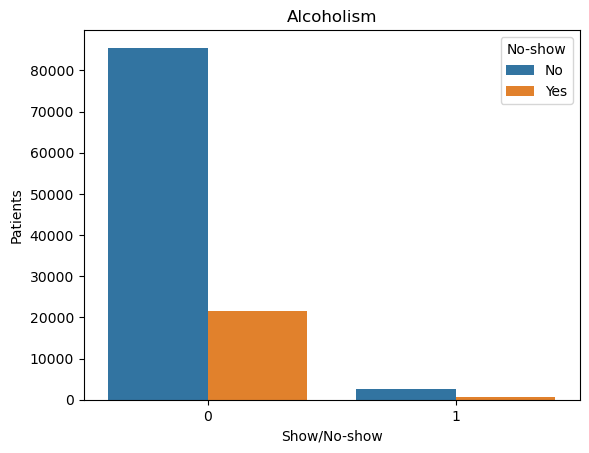

In [30]:
plot(no_show_df, 'Alcoholism', 'No-show', title= 'Alcoholism', xlabel= 'Show/No-show', ylabel= 'Patients')

In [31]:
no_show_df.groupby('Alcoholism').mean()['No_show']

Alcoholism
0    0.201946
1    0.201488
Name: No_show, dtype: float64

**The above chart and table shows that 20% of those without the problem of alcoholism showed up for their appointment, while another 20% of those with the problem did not show up.**

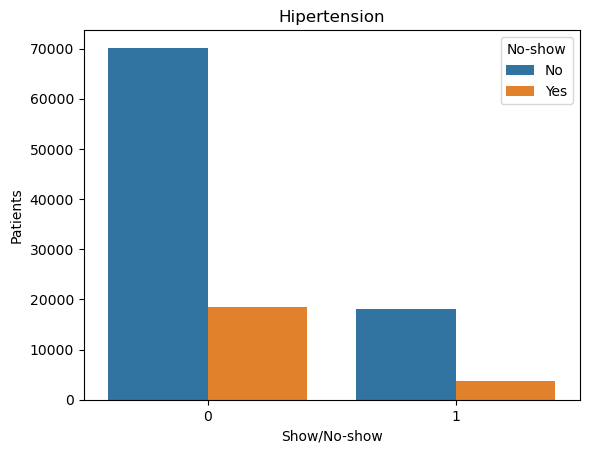

In [32]:
plot(no_show_df, 'Hipertension', 'No-show', title= 'Hipertension', xlabel= 'Show/No-show', ylabel= 'Patients')

In [33]:
no_show_df.groupby('Hipertension').mean()['No_show']

Hipertension
0    0.209037
1    0.173020
Name: No_show, dtype: float64

**The above chart and table shows that most 20% of hipertensive patients showed up for their medical appointment, while 17% of those with hipertension did not show up.**

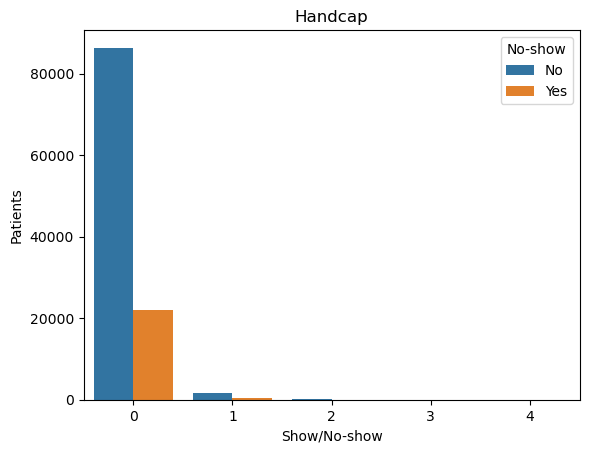

In [34]:
plot(no_show_df, 'Handcap', 'No-show', title= 'Handcap', xlabel= 'Show/No-show', ylabel= 'Patients')

**The above chart shows that most handicapped patients showed up for their medical appointment.**

**Generally, patients with the four conditions (hipertension, alcoholism, diabetes, and handicap) showed up for their medical appointments.**

# Data Wrangling



**df.describe() revealed that the Age column had a minimum value of -1. It is impossible for age to have a negative value, so I replaced this value with zero (0), as this is the minimum age any human can be.**

# Conclusions

**We set out to answer five questions in this analysis; in the end, we can make the following conclusions:**

+ **There are no missing values.**
+ **Only about 30,000 patients received SMS; over 70,000 patients did not.**
+ **There are a few older (senior) patients, with just above 5,000 aged between 70 and 80, and another about above 2,500 patients aged between 80 and 100, while there are over 17,500 patients aged between 0 and 10.**
+ **SMS received did not increase the chances of patients showing up**
+ **Most patients with medical conditions showed up for their appointment (e.g.Diabetes- 20%, Hipertension- 20%)**

**One key limitation to this report is my inability to find the distance between a patient's neighbourhood and the location of the hospital, as this could significantly impact whether a patient shows up or not.**

